In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_palette("Set1")
sns.set_style('darkgrid')

In [4]:
# load and read the data
df1 = pd.read_csv(r'C:\Users\Gaukhar\Python\mu23\Titanic-Dataset.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Get the information about the data
df1.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
# Get the no of rows and columns
df1.shape

(891, 12)

In [7]:
#Get all the column names
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Get the description of the data
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Get the description of the categorical (object) data
df1.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<Axes: xlabel='Survived', ylabel='count'>

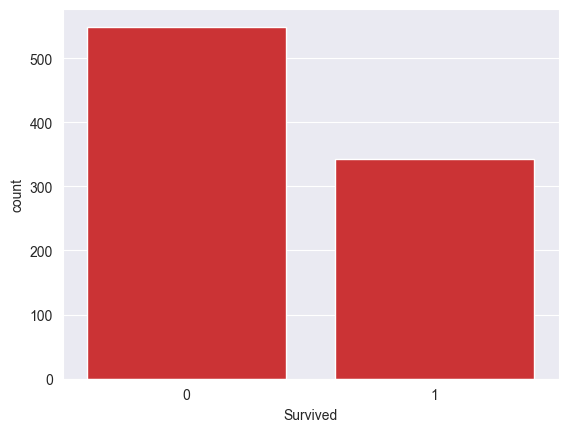

In [10]:
# Visualize the distribution of survival status among passengers
sns.countplot(x = 'Survived', data=df1)

<Axes: xlabel='Survived', ylabel='count'>

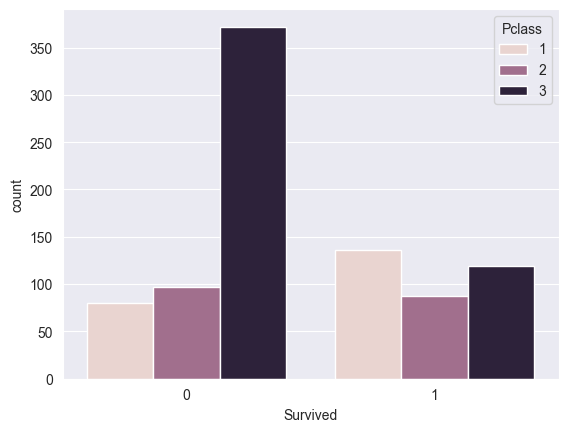

In [11]:
sns.countplot(x = 'Survived', hue = 'Pclass', data=df1)

<Axes: xlabel='Pclass', ylabel='count'>

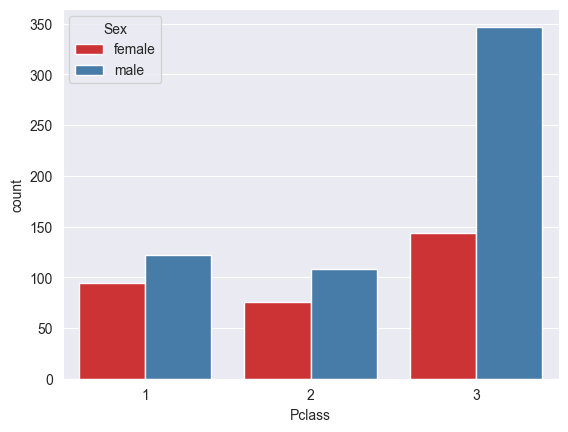

In [12]:
sns.countplot(x='Pclass', hue='Sex', data=df1)

<Axes: xlabel='Age', ylabel='Count'>

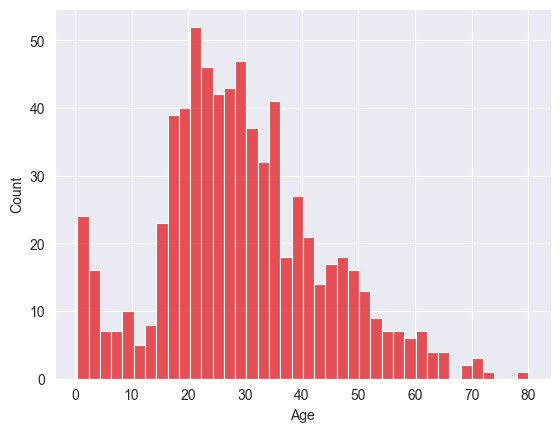

In [13]:
sns.histplot(df1['Age'], bins=40)

In [14]:
# Count the number of missing values in each column of the DataFrame df
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

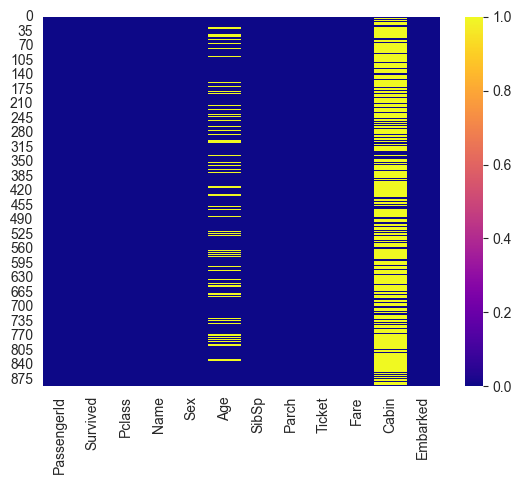

In [15]:
# Visualize the distribution of missing values in the DataFrame df using a heatmap with the 'plasma' colormap and a color bar
sns.heatmap(df1.isnull(), cmap='plasma', cbar=True)

In [16]:
# Drop the 'Cabin' column from the DataFrame df
df1.drop(columns=['Cabin'], axis=1, inplace=True)

C:\Users\Gaukhar\AppData\Local\Temp\ipykernel_11956\3093778052.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=df, palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

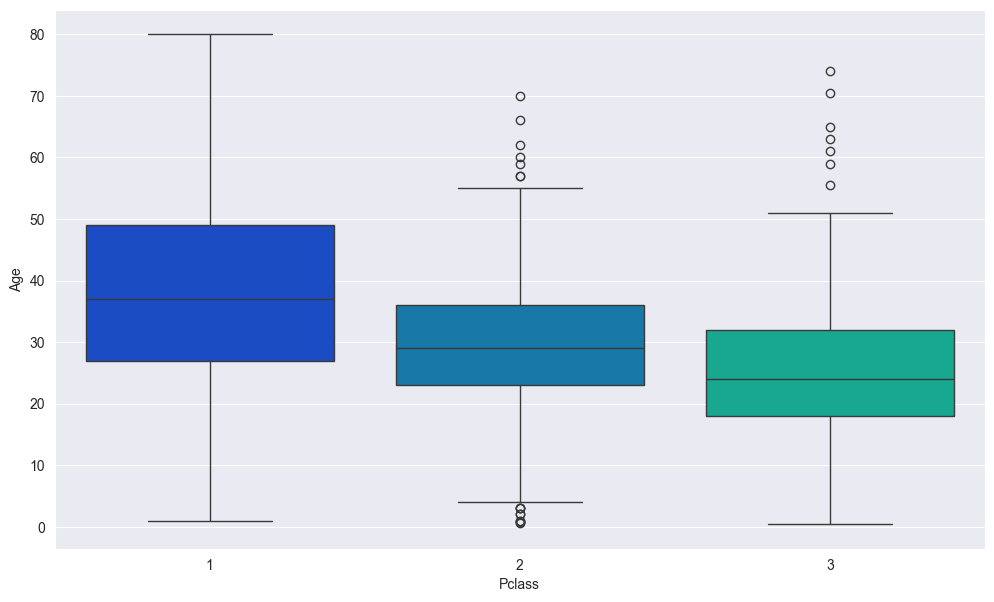

In [17]:
# Create a figure with a size of 12x7 inches and plot a boxplot showing the distribution of passenger ages across different passenger classes
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=df1, palette='winter')

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 35

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [19]:
df1['Age'] = df1[['Age', 'Pclass']].apply(impute_age, axis=1)

C:\Users\Gaukhar\AppData\Local\Temp\ipykernel_11956\2337388933.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Gaukhar\AppData\Local\Temp\ipykernel_11956\2337388933.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [20]:
df1['Fare'] = df1['Fare'].fillna(df1['Fare'].mean())

In [21]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [22]:
df1.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [23]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,25.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [24]:
df_new = pd.get_dummies(df1, columns=['Sex', 'Embarked'])

In [25]:
df_new['Sex_female'] = df_new['Sex_female'].astype(int)
df_new['Sex_male'] = df_new['Sex_male'].astype(int)
df_new['Embarked_C'] = df_new['Embarked_C'].astype(int)
df_new['Embarked_Q'] = df_new['Embarked_Q'].astype(int)
df_new['Embarked_S'] = df_new['Embarked_S'].astype(int)

In [26]:
df_new

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,25.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [27]:
#Modeling: Decision Tree and Random Forest Algorithms

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [29]:
# Splitting the dataset into features and target variable
X = df_new.drop('Survived', axis=1)
y = df_new['Survived']

In [30]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Decision Tree Algorithm
decision_tree = DecisionTreeClassifier(random_state=42)

In [33]:
# Random Forest Algorithm
random_forest = RandomForestClassifier(random_state=42)

In [34]:
# Training the Decision Tree model
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
# Training the Random Forest model
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Making predictions DT
y_pred_dt = decision_tree.predict(X_test_scaled)

In [37]:
# Making predictions RF
y_pred_rf = random_forest.predict(X_test_scaled)

In [38]:
# Evaluating DT
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.776536312849162


In [39]:
# Evaluating RF
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8156424581005587
